In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
metadata = pd.read_csv("E:/COVID_Research_Trends_Analysis/data/metadata.csv",low_memory=False)
print(metadata.columns.tolist())
#print(metadata.shape)
#print(metadata.info())
#print(metadata.describe())
print(metadata.isnull().sum())
print(metadata.duplicated().sum())
metadata=metadata.drop(["Microsoft Academic Paper ID","WHO #Covidence"],axis=1)

['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_pdf_parse', 'has_pmc_xml_parse', 'full_text_file', 'url']
cord_uid                           0
sha                            13374
source_x                           0
title                            158
doi                             3340
pmcid                           8746
pubmed_id                      14340
license                            0
abstract                        9231
publish_time                       8
authors                         2279
journal                         5242
Microsoft Academic Paper ID    51434
WHO #Covidence                 50630
has_pdf_parse                      0
has_pmc_xml_parse                  0
full_text_file                  8604
url                              302
dtype: int64
0


In [3]:
#drop null values
metadata=metadata[metadata["abstract"].notna()]

#print(metadata["publish_time"])
#converting publishtime to datetime
metadata["publish_time"]=pd.to_datetime(metadata["publish_time"],errors="coerce")

#papers published in 2020 or more
metadata=metadata[(metadata["publish_time"]>="2020-01-01") & (metadata["publish_time"]<="2023-01-01")]
#print(metadata.head())





C:\Users\anisb\AppData\Local\Temp\ipykernel_18384\2852267196.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pubs_per_month=metadata.set_index("publish_time").resample("M")["title"].count()


publish_time
2020-01-31     280
2020-02-29     778
2020-03-31    1597
2020-04-30    1247
2020-05-31      51
2020-06-30      49
2020-07-31      17
2020-08-31      17
2020-09-30       0
2020-10-31       1
2020-11-30       1
2020-12-31     108
Freq: ME, Name: title, dtype: int64


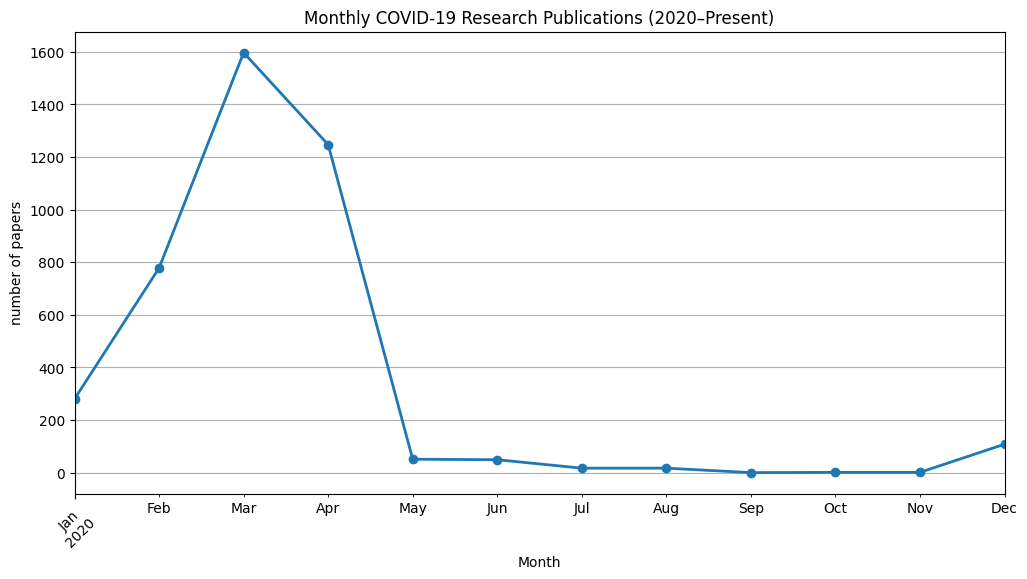

In [4]:
#visualization
#plotting the number of papers published each month
pubs_per_month=metadata.set_index("publish_time").resample("M")["title"].count()
print(pubs_per_month)
plt.figure(figsize=(12,6))
pubs_per_month.plot(kind="line",marker="o",color="#1f77b4",linewidth=2)
plt.title("Monthly COVID-19 Research Publications (2020–Present)")
plt.xlabel("Month")
plt.ylabel("number of papers")
plt.grid(True)
plt.savefig("E:/COVID_Research_Trends_Analysis/outputs/monthly_pubs.png", dpi=300, bbox_inches="tight")
plt.xticks(rotation=45)
plt.show()




In [5]:
#Identifying top research contributors
metadata["authors"]=metadata["authors"].str.split(r'; |, ' )
#print(metadata["authors"])
authors_exploded=metadata.explode("authors")
top_authors=authors_exploded["authors"].value_counts()
print(top_authors)

authors
Wang          475
Li            441
Zhang         368
Liu           301
Chen          283
             ... 
Sameeh S.       1
Algwizani       1
Almoaddi        1
Alsaqer         1
Abdulrahim      1
Name: count, Length: 27425, dtype: int64


In [6]:
#journal analysis : Finding the top 10 journals
metadata_clean=metadata.dropna(subset=["journal"])
#top 10 journals
top_journals=metadata["journal"].value_counts()
print(top_journals)


journal
New Scientist                       50
Journal of Medical Virology         48
The Lancet                          35
Euro Surveill                       34
Viruses                             28
                                    ..
Neurosci Bull                        1
Journal of Comparative Pathology     1
Scientific African                   1
Measurement                          1
World J Clin Cases                   1
Name: count, Length: 914, dtype: int64


C:\Users\anisb\AppData\Local\Temp\ipykernel_18384\4265917249.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


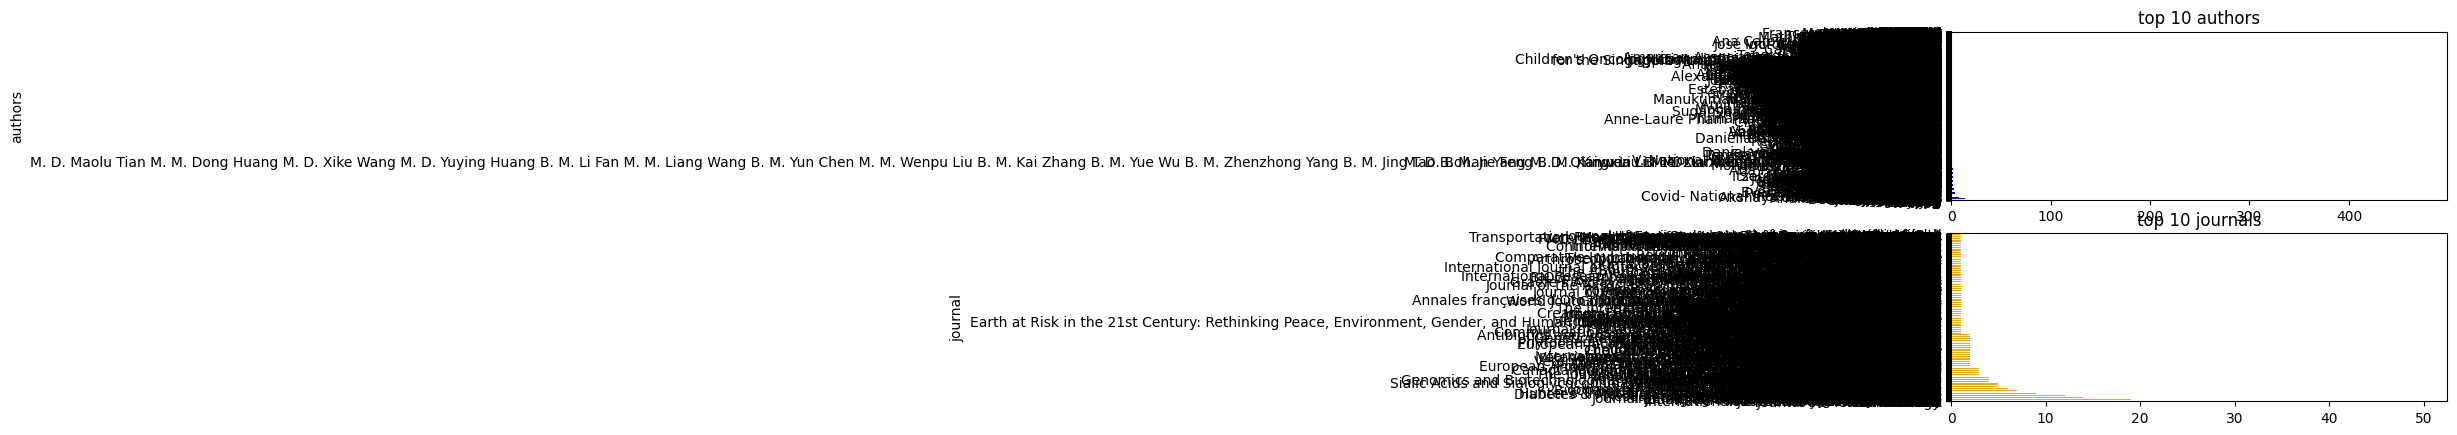

In [ ]:
#visualizing
plt.Figure(figsize=(12,6))
plt.subplot(2,1,1)
top_authors.plot(kind="barh",color="blue")
plt.title("top 10 authors")

plt.subplot(2,1,2)
top_journals.plot(kind="barh",color="orange")
plt.title("top 10 journals")
plt.tight_layout()
plt.show()